In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df_turk = pd.read_csv("merged_data.csv")
df_turk.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Time,Temperature(°C),Precipitation(mm),Cloudcover(%),Pressure(hPa),Wind Speed(km / h),Dewpoint(°C)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,01 01 2018 00:00,-1.3,0.0,9,917.2,8.2,-2.1
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,01 01 2018 00:10,-1.3,0.0,9,917.2,8.2,-2.1
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,01 01 2018 00:20,-1.3,0.0,9,917.2,8.2,-2.1
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,01 01 2018 00:30,-1.3,0.0,9,917.2,8.2,-2.1
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,01 01 2018 00:40,-1.3,0.0,9,917.2,8.2,-2.1


In [3]:
df_turk = df_turk.drop("Time", axis=1)

### general info about dataset

In [4]:
df_turk.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Temperature(°C),Precipitation(mm),Cloudcover(%),Pressure(hPa),Wind Speed(km / h),Dewpoint(°C)
count,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000
mean,1288.277878,7.418188,1429.606141,123.516514,11.435660,0.127169,37.226358,917.505099,9.114035,7.396312
std,1337.386409,4.440288,1398.891801,91.721836,6.833094,0.499315,36.127229,5.251758,5.498332,5.973955
min,-0.959000,0.000000,0.000000,0.000000,-6.400000,0.000000,0.000000,902.000000,0.000000,-9.200000
25%,31.269750,3.840083,99.341856,53.618423,6.300000,0.000000,4.000000,914.200000,5.200000,2.800000
50%,738.516754,6.690191,882.419541,74.196899,11.400000,0.000000,25.000000,917.700000,7.900000,8.000000
75%,2524.813171,10.371822,3002.444859,201.964504,16.800000,0.000000,68.000000,921.000000,11.500000,12.100000
max,3605.758057,25.206011,3600.000000,359.977295,26.300000,11.100000,100.000000,932.700000,32.000000,18.700000


In [5]:
df_turk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19986 entries, 0 to 19985
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      19986 non-null  object 
 1   LV ActivePower (kW)            19986 non-null  float64
 2   Wind Speed (m/s)               19986 non-null  float64
 3   Theoretical_Power_Curve (KWh)  19986 non-null  float64
 4   Wind Direction (°)             19986 non-null  float64
 5   Temperature(°C)                19986 non-null  float64
 6   Precipitation(mm)              19986 non-null  float64
 7   Cloudcover(%)                  19986 non-null  int64  
 8   Pressure(hPa)                  19986 non-null  float64
 9   Wind Speed(km / h)             19986 non-null  float64
 10  Dewpoint(°C)                   19986 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
list(df_turk.columns)

['Date/Time',
 'LV ActivePower (kW)',
 'Wind Speed (m/s)',
 'Theoretical_Power_Curve (KWh)',
 'Wind Direction (°)',
 'Temperature(°C)',
 'Precipitation(mm)',
 'Cloudcover(%)',
 'Pressure(hPa)',
 'Wind Speed(km / h)',
 'Dewpoint(°C)']

In [7]:
df_turk.isnull().values.any()

False

### working with negative LV ActivePower (kW)

In [8]:
# count_lv_act_power < 0
(df_turk["LV ActivePower (kW)"] < 0).sum()

27

In [9]:
df_turk.loc[df_turk["LV ActivePower (kW)"] < 0, "LV ActivePower (kW)"] = 0

In [10]:
(df_turk["LV ActivePower (kW)"] < 0).sum()

0

In [11]:
df_turk['Date/Time']=pd.to_datetime(df_turk['Date/Time'],format='%d %m %Y %H:%M')

In [12]:
df_turk["Date/Time"].tail()

19981   2018-12-12 23:10:00
19982   2018-12-12 23:20:00
19983   2018-12-12 23:30:00
19984   2018-12-12 23:40:00
19985   2018-12-12 23:50:00
Name: Date/Time, dtype: datetime64[ns]

### working with Date/Time

In [13]:
df_turk['Week']=(df_turk['Date/Time'] - df_turk['Date/Time'].dt.to_period('M').dt.to_timestamp()).dt.days // 7 + 1
filter=df_turk['Week'].loc[df_turk['Week']==5]
filter=filter-1
df_turk['Week'].update(filter)
df_turk['Week'].value_counts()

Week
1    12084
2     7902
Name: count, dtype: int64

In [14]:
df_turk['Month']=df_turk['Date/Time'].dt.month

In [15]:
seasons_dict = {1: 'Winter',
                2: 'Winter',
                3: 'Winter',
                4: 'Spring',
                5: 'Spring',
                6: 'Summer',
                7: 'Summer',
                8: 'Summer',
                9: 'Autumn',
                10: 'Autumn',
                11: 'Autumn', 
                12: 'Winter'}
df_turk['Seasons'] = df_turk['Month'].map(seasons_dict)

In [16]:
df_turk['Day']=df_turk['Date/Time'].dt.day

In [17]:
df_turk.drop(columns=['Date/Time'],inplace=True)

### splitting data

In [18]:
### creating target feature

In [19]:
df_turk["Working"] = (df_turk["LV ActivePower (kW)"] >= 400)

In [20]:
df_train,df_test=train_test_split(df_turk,test_size=0.3,random_state=17)

In [21]:
date_type_col=['Day', 'Hour','Week','Month','Seasons','Hour']
num_type_col=['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)', 'Temperature(°C)',
 'Precipitation(mm)',
 'Cloudcover(%)',
 'Pressure(hPa)',
 'Wind Speed(km / h)',
 'Dewpoint(°C)']

In [22]:
df_turk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19986 entries, 0 to 19985
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LV ActivePower (kW)            19986 non-null  float64
 1   Wind Speed (m/s)               19986 non-null  float64
 2   Theoretical_Power_Curve (KWh)  19986 non-null  float64
 3   Wind Direction (°)             19986 non-null  float64
 4   Temperature(°C)                19986 non-null  float64
 5   Precipitation(mm)              19986 non-null  float64
 6   Cloudcover(%)                  19986 non-null  int64  
 7   Pressure(hPa)                  19986 non-null  float64
 8   Wind Speed(km / h)             19986 non-null  float64
 9   Dewpoint(°C)                   19986 non-null  float64
 10  Week                           19986 non-null  int64  
 11  Month                          19986 non-null  int32  
 12  Seasons                        19986 non-null 

In [23]:
list(df_turk.columns)

['LV ActivePower (kW)',
 'Wind Speed (m/s)',
 'Theoretical_Power_Curve (KWh)',
 'Wind Direction (°)',
 'Temperature(°C)',
 'Precipitation(mm)',
 'Cloudcover(%)',
 'Pressure(hPa)',
 'Wind Speed(km / h)',
 'Dewpoint(°C)',
 'Week',
 'Month',
 'Seasons',
 'Day',
 'Working']

### visualising data

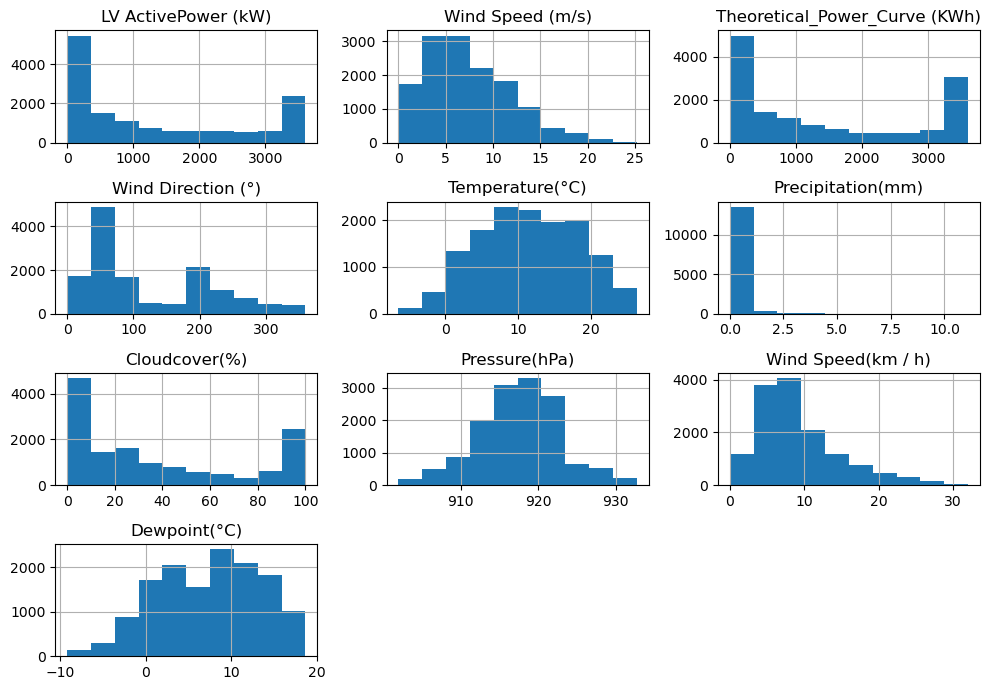

In [24]:
df_train[num_type_col].hist(figsize=(10,7))
plt.tight_layout()
#plt.savefig("img1.png")

In [25]:
# # `pairplot()` may become very slow with the SVG format
# %config InlineBackend.figure_format = 'png'
# sns.pairplot(df_turk[num_type_col])

In [26]:
# %config InlineBackend.figure_format = 'svg'

<Axes: xlabel='Wind Speed (m/s)', ylabel='Theoretical_Power_Curve (KWh)'>

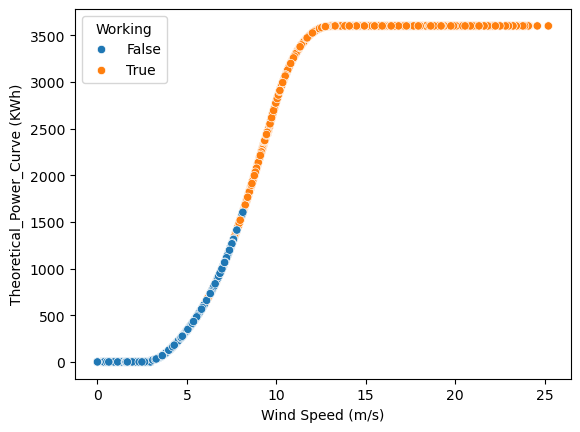

In [27]:
sns.scatterplot(data=df_turk, x = "Wind Speed (m/s)", y="Theoretical_Power_Curve (KWh)", hue=df_turk["Working"])
#plt.savefig("i2.png")

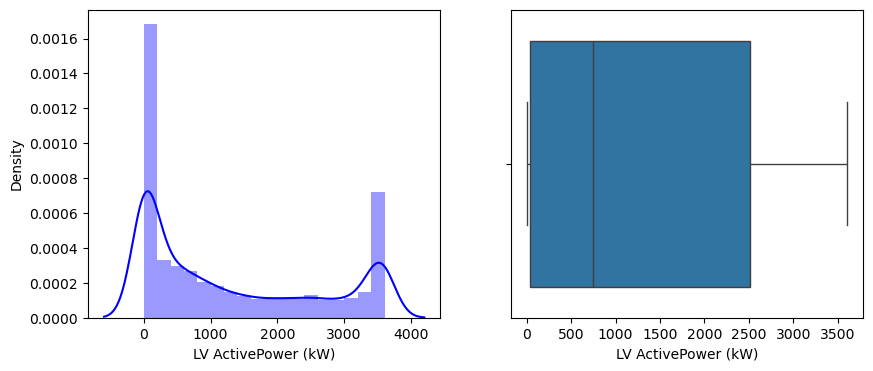

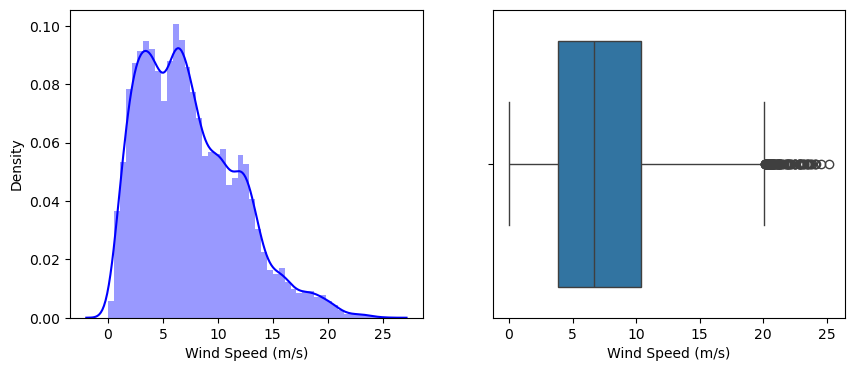

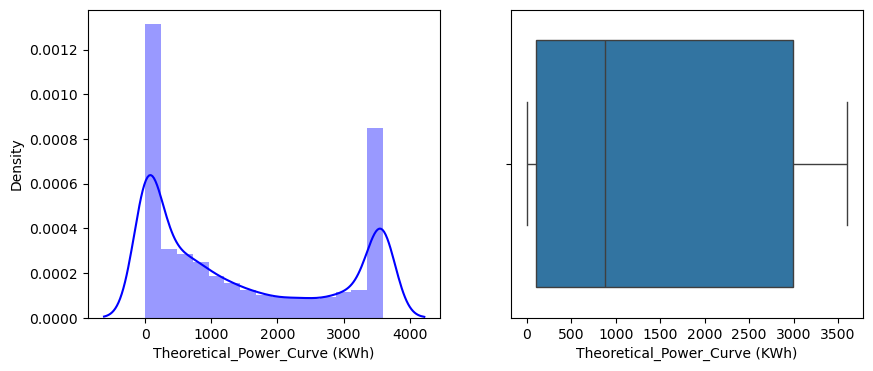

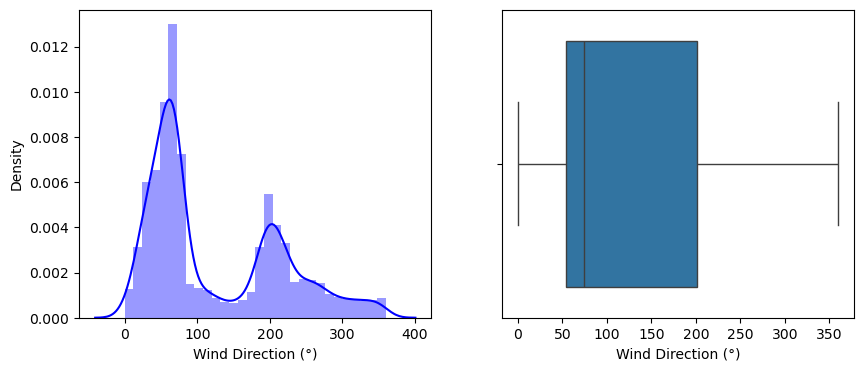

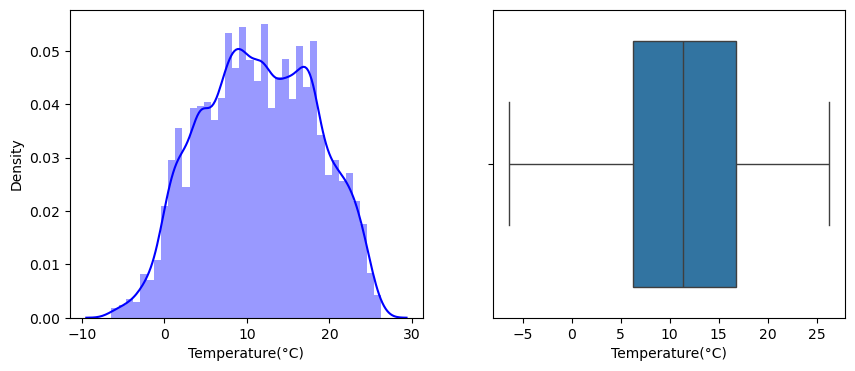

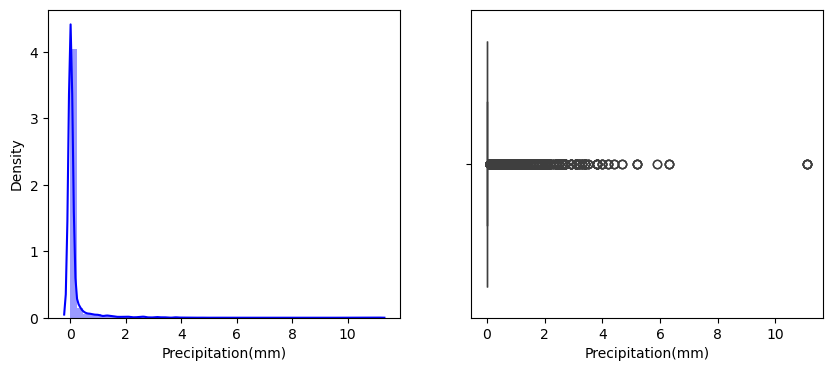

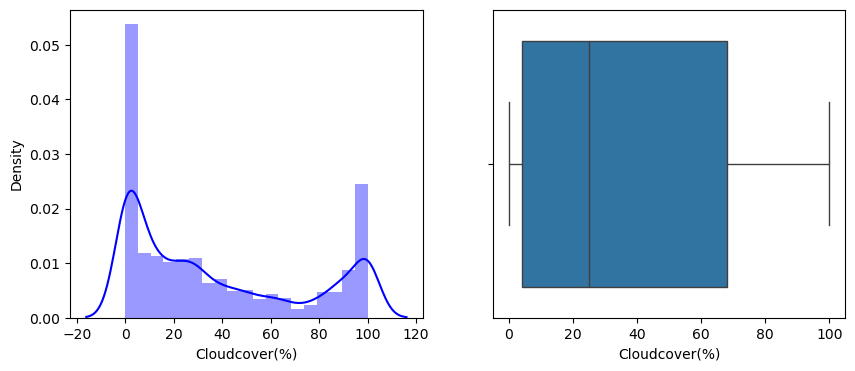

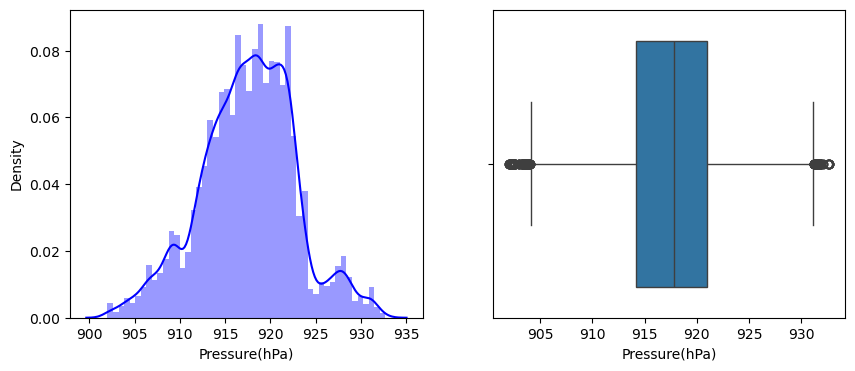

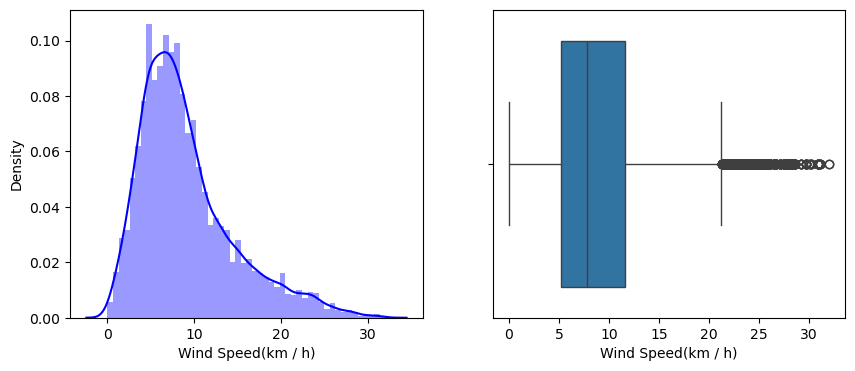

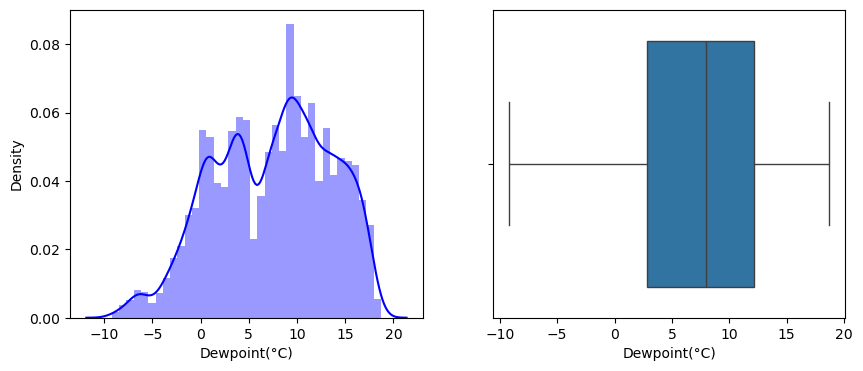

In [28]:
for col in num_type_col:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.distplot(df_train[col], ax=ax[0] ,color='blue')  
    sns.boxplot(x=df_train[col], ax=ax[1])
    plt.show()
    #plt.savefig("i3.png")


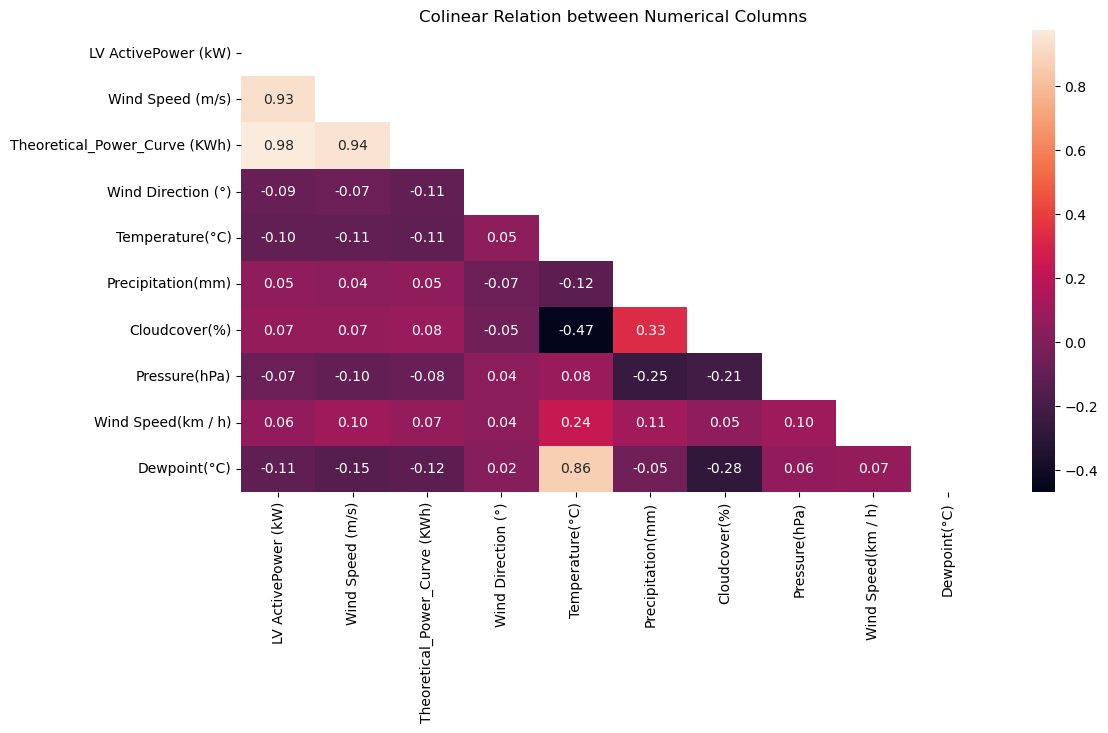

In [29]:
corr = df_train[num_type_col].corr(numeric_only=True)
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))
plt.title('Colinear Relation between Numerical Columns')
sns.heatmap(corr, annot=True,mask=mask, fmt='.2f')
sns.color_palette("magma", as_cmap=True)
plt.show()
#plt.savefig("i4.png")

In [30]:
# fig,axes=plt.subplots(nrows=len(num_type_col)//2 ,ncols=2,figsize=(10,6))
# for idx,col in enumerate(df_train[num_type_col]):
#     row_idx=idx//2
#     col_idx=idx%2
#     sns.barplot(x=df_train['Month'],y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
# fig.suptitle('Numerical Columns over the Months', fontsize=16)
# plt.tight_layout()
# plt.tight_layout()
# plt.show() 
# plt.savefig("i5.png")

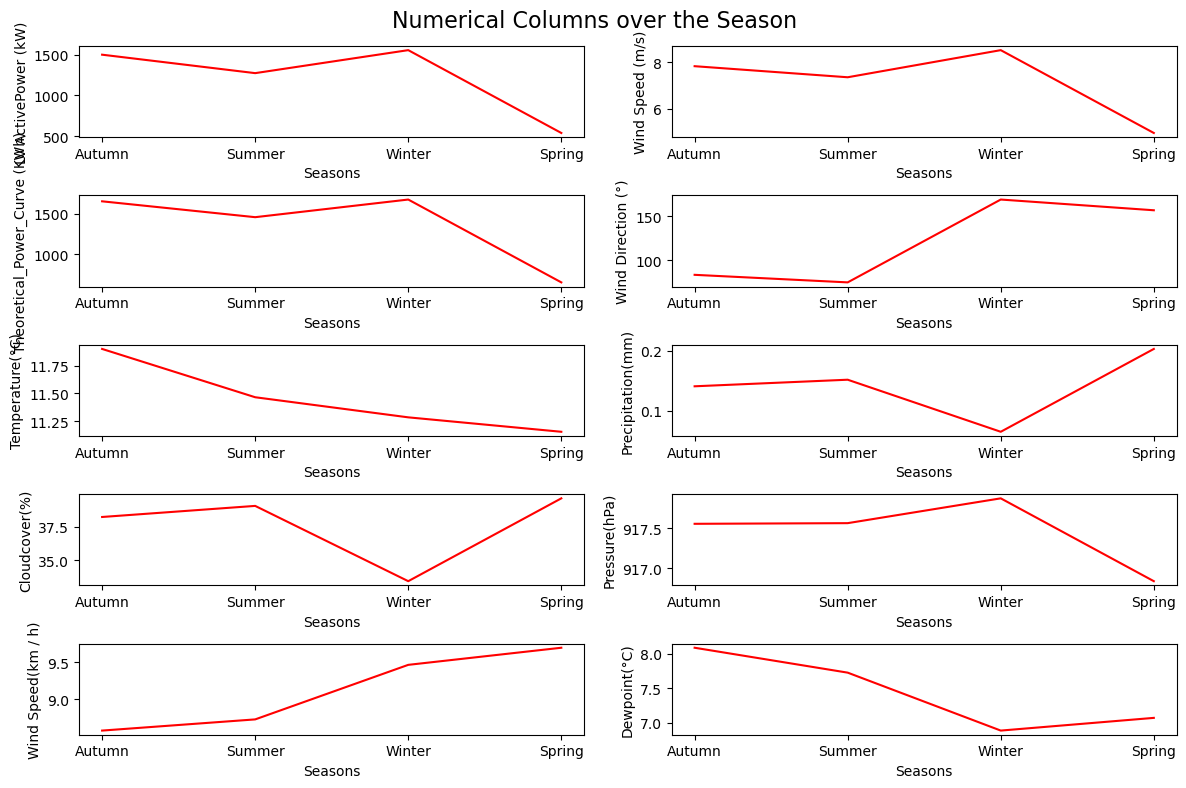

In [31]:
fig,axes=plt.subplots(nrows=len(num_type_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[num_type_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Seasons',y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],ci=None,color='red')
fig.suptitle('Numerical Columns over the Season', fontsize=16)
plt.tight_layout()
plt.show() 
#plt.savefig("i6.png")


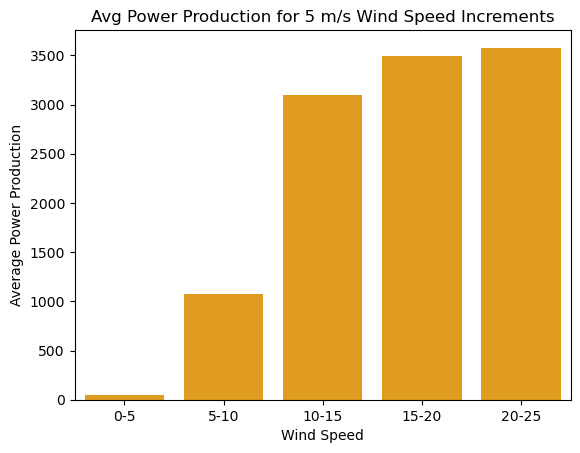

In [32]:
# Finding average power production for 5 m/s wind speed increments
wind_speed = []
avg_power = []
for i in [0, 5, 10, 15, 20]:
    filtered_data = df_turk[(df_turk['Wind Speed (m/s)'] > i) & (df_turk['Wind Speed (m/s)'] <= i + 5)]
    avg_value = filtered_data['LV ActivePower (kW)'].mean()
    avg_power.append(avg_value)
    wind_speed.append(f"{i}-{i+5}")

sns.barplot(x=wind_speed, y=avg_power, color='orange')
plt.title('Avg Power Production for 5 m/s Wind Speed Increments')
plt.xlabel('Wind Speed')
plt.ylabel('Average Power Production');
#plt.savefig("i7.png")


In [33]:
df_turk.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)',
       'Temperature(°C)', 'Precipitation(mm)', 'Cloudcover(%)',
       'Pressure(hPa)', 'Wind Speed(km / h)', 'Dewpoint(°C)', 'Week', 'Month',
       'Seasons', 'Day', 'Working'],
      dtype='object')

### Preprocessing

In [34]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestRegressor

In [35]:
#Outlier Equation
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit

#Outlier Count    
def outlier_percentage(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers= [x for x in dataframe[col] if (x>up_limit) | (x<low_limit)]
    print(col)
    # print("Outliers percentage:", len(outliers)#/(dataframe[column].shape[0])*100,"%")
    print("Outliers Count :", len(outliers))
    print("-------------------------")   
#Checking Outliers 
def check_outliers(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers=(dataframe[column]>up_limit) | (dataframe[column]<low_limit)
    if outliers.any():
        return True
    else:
        return False
#Replace with IQR     
def replace_with_threshholds(dataframe,dataframe2,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
    dataframe2.loc[(dataframe2[column]<low_limit),column]=low_limit
    dataframe2.loc[(dataframe2[column]>up_limit),column]=up_limit  

for col in (num_type_col):
    outlier_percentage(df_train,col)

LV ActivePower (kW)
Outliers Count : 0
-------------------------
Wind Speed (m/s)
Outliers Count : 120
-------------------------
Theoretical_Power_Curve (KWh)
Outliers Count : 0
-------------------------
Wind Direction (°)
Outliers Count : 0
-------------------------
Temperature(°C)
Outliers Count : 0
-------------------------
Precipitation(mm)
Outliers Count : 2577
-------------------------
Cloudcover(%)
Outliers Count : 0
-------------------------
Pressure(hPa)
Outliers Count : 173
-------------------------
Wind Speed(km / h)
Outliers Count : 625
-------------------------
Dewpoint(°C)
Outliers Count : 0
-------------------------


In [36]:
for column in num_type_col:
    replace_with_threshholds(df_train,df_test,column)
    print(column,check_outliers(df_train,column))

LV ActivePower (kW) False
Wind Speed (m/s) False
Theoretical_Power_Curve (KWh) False
Wind Direction (°) False
Temperature(°C) False
Precipitation(mm) False
Cloudcover(%) False
Pressure(hPa) False
Wind Speed(km / h) False
Dewpoint(°C) False


### Split Target and Label Columns

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(columns=['LV ActivePower (kW)', 'Working']),
    df_train['Working'],
    test_size=0.3,  
    random_state=42 
)

In [38]:
print("The Shape of X_train is :",X_train.shape)
print("The Shape of y_train is :",y_train.shape)
print("The Shape of X_test is :",X_test.shape)
print("The Shape of y_test is :",y_test.shape)

The Shape of X_train is : (9793, 13)
The Shape of y_train is : (9793,)
The Shape of X_test is : (4197, 13)
The Shape of y_test is : (4197,)


### Pipeline

In [39]:
num_col=['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)','Week','Month','Day', 'Temperature(°C)',
 'Precipitation(mm)',
 'Cloudcover(%)',
 'Pressure(hPa)',
 'Wind Speed(km / h)',
 'Dewpoint(°C)']
cat_attribs=['Seasons']

In [40]:
num_pipeline=make_pipeline(StandardScaler())
cat_pipeline=make_pipeline(OrdinalEncoder())
preprocessing=ColumnTransformer([
     ('num',num_pipeline,num_col),
     ('cat',cat_pipeline,cat_attribs)
     ])

In [41]:
X_train

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Temperature(°C),Precipitation(mm),Cloudcover(%),Pressure(hPa),Wind Speed(km / h),Dewpoint(°C),Week,Month,Seasons,Day
7986,4.442437,209.913983,317.632294,18.6,0.0,7,918.7,8.1,17.8,2,5,Spring,8
19548,12.838040,3595.839489,223.519699,14.3,0.0,41,918.3,8.8,12.6,2,12,Winter,9
1949,19.920250,3600.000000,195.438705,7.7,0.0,58,908.3,9.6,0.8,1,2,Winter,3
10206,8.323469,1720.314529,40.936470,0.6,0.0,100,918.7,21.2,-0.9,2,6,Summer,12
7389,6.990970,1011.929059,69.284622,15.4,0.0,27,915.9,3.6,3.0,1,5,Spring,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17916,6.602837,846.807640,69.733658,20.5,0.0,18,921.2,21.2,10.2,2,11,Autumn,8
8870,6.810454,932.896226,70.742401,-0.7,0.0,9,921.7,3.7,-1.4,1,6,Summer,2
9588,6.726272,897.385376,65.358124,20.8,0.0,1,919.6,12.6,15.3,2,6,Summer,8
19111,10.273110,2950.551951,21.288830,12.1,0.0,0,910.1,6.2,9.7,1,12,Winter,6


In [42]:
X_1=pd.DataFrame(preprocessing.fit_transform(X_train))
X_1_test=pd.DataFrame(preprocessing.transform(X_test))

In [43]:
X_1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.669578,-0.868100,2.108590,1.228453,-0.409283,0.498704,1.043164,0.0,-0.833692,0.225876,-0.170438,1.726597,1.0
1,1.239413,1.559470,1.085023,1.228453,1.639702,0.793210,0.417959,0.0,0.109016,0.148827,-0.032848,0.865988,3.0
2,2.849765,1.562453,0.779615,-0.814032,-1.287419,-0.973830,-0.541658,0.0,0.580369,-1.777398,0.124397,-1.086932,3.0
3,0.212890,0.214795,-0.900750,1.228453,-0.116571,1.676731,-1.573973,0.0,1.744891,0.225876,2.404447,-1.368285,2.0
4,-0.090093,-0.293088,-0.592436,-0.814032,-0.409283,-0.679323,0.577895,0.0,-0.279158,-0.313467,-1.054940,-0.722828,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,-0.178347,-0.411473,-0.587552,1.228453,1.346990,0.498704,1.319417,0.0,-0.528699,0.707432,2.404447,0.468784,0.0
9789,-0.131139,-0.349751,-0.576581,-0.814032,-0.116571,-1.268337,-1.762988,0.0,-0.778239,0.803743,-1.035284,-1.451036,2.0
9790,-0.150280,-0.375211,-0.635140,1.228453,-0.116571,0.498704,1.363036,0.0,-1.000052,0.399236,0.714065,1.312843,2.0
9791,0.656199,1.096825,-1.114437,-0.814032,1.639702,-0.090310,0.098087,0.0,-1.027779,-1.430678,-0.543894,0.386033,3.0


### Feature Importance

In [44]:
X_train_1,X_valid,y_train_1,y_valid=train_test_split(X_1,y_train,test_size=0.2,random_state=42)
#Create and train a Random Forest regressor
model=RandomForestRegressor(random_state=17)
model.fit(X_train_1,y_train_1)
feature_importance=model.feature_importances_
#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importance})
#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

In [45]:
feature_importance_df

,Feature,Importance
0,Wind Speed (m/s),0.494177
1,Theoretical_Power_Curve (KWh),0.407810
10,Month,0.015630
2,Wind Direction (°),0.014975
6,Pressure(hPa),0.014963
4,Precipitation(mm),0.013151
11,Seasons,0.011196
9,Week,0.009944
5,Cloudcover(%),0.008153
8,Dewpoint(°C),0.006260


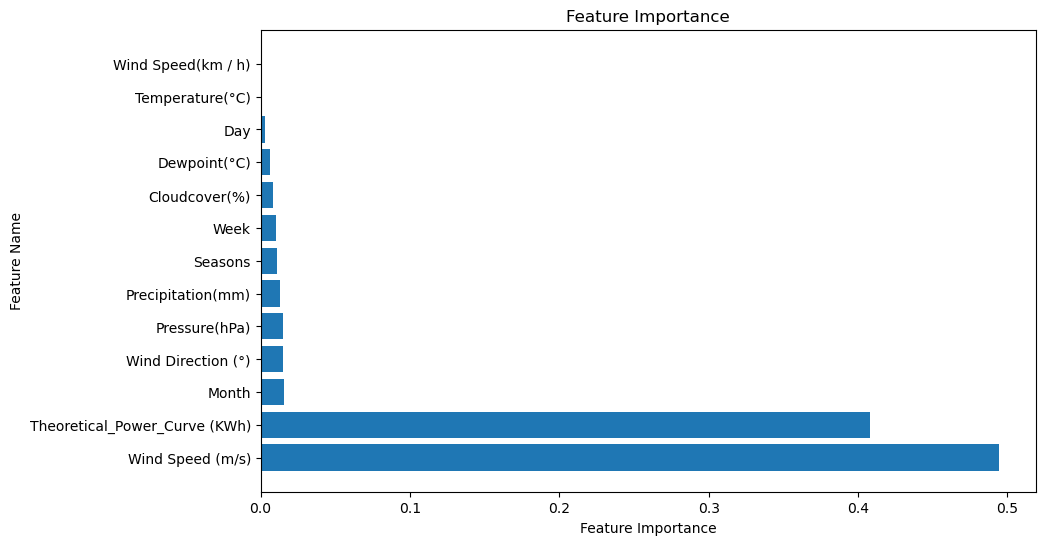

In [46]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()
#plt.savefig("i8.pdf")

### Modeling

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.model_selection import RandomizedSearchCV

In [48]:
model_name=[]
r2score=[]
rmse=[]
models=[
    GradientBoostingRegressor(random_state=17),
    SVR(),
    LinearRegression(),
    AdaBoostRegressor(random_state=17),
    DecisionTreeRegressor(random_state=17),
    XGBRegressor(random_state=17),
    XGBRFRegressor(random_state=17)
]

for model in models:
    model.fit(X_1 , y_train)
    y_pred = model.predict(X_1_test)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( y_test , y_pred,squared=False )))



In [49]:
models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})

In [50]:
models_df

,Model-Name,R2_score,RMSE
0,GradientBoostingRegressor,91.691094,0.140826
1,SVR,85.738917,0.184496
2,LinearRegression,58.774907,0.313683
3,AdaBoostRegressor,84.405930,0.192926
4,DecisionTreeRegressor,89.717982,0.156657
5,XGBRegressor,94.181952,0.117842
6,XGBRFRegressor,92.421618,0.134493


In [51]:
models_df["Model-Name"]

0    GradientBoostingRegressor
1                          SVR
2             LinearRegression
3            AdaBoostRegressor
4        DecisionTreeRegressor
5                 XGBRegressor
6               XGBRFRegressor
Name: Model-Name, dtype: object

### Plot Model Scores

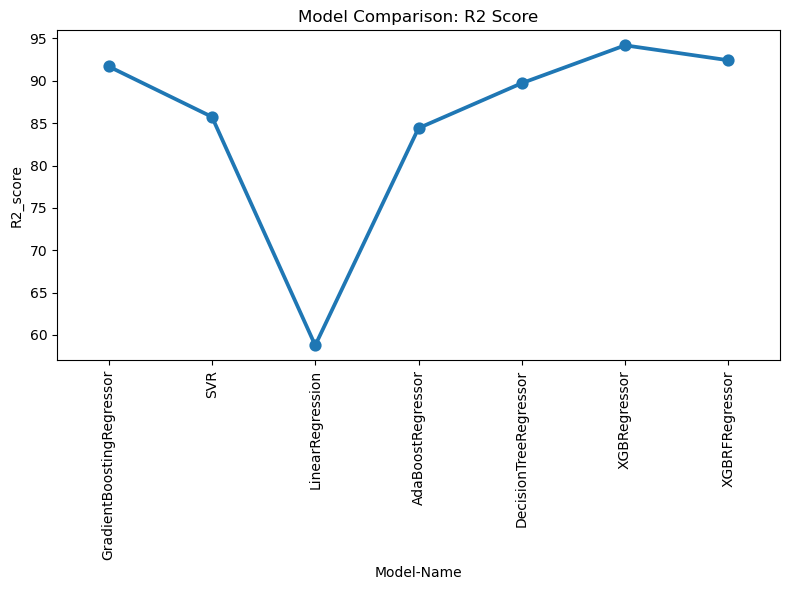

In [52]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='R2_score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

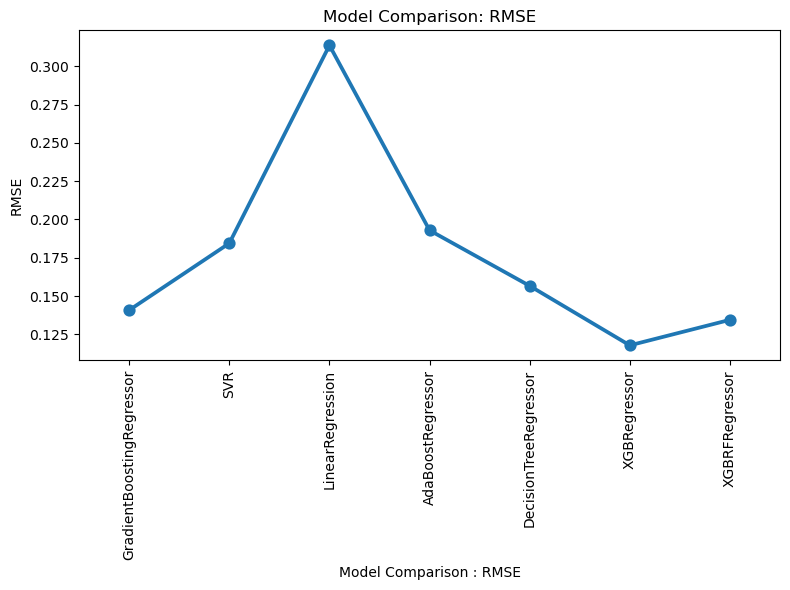

In [53]:
plt.figure(figsize=(8,6))
plt.xlabel('Model Comparison : RMSE')
sns.pointplot(x='Model-Name',y='RMSE',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

### Final Model

In [54]:
fm=XGBRegressor(random_state=17)

In [55]:
#set of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4],
    'base_score': [0.25, 0.5, 0.75, 1]
}

In [56]:
random_search = RandomizedSearchCV(estimator=fm, param_distributions=param_grid, n_iter=50, scoring='r2', n_jobs=-1)

In [57]:
%%time
# be careful, can be a long time 
random_search.fit(X_1, y_train)

CPU times: user 31.6 s, sys: 1.63 s, total: 33.2 s
Wall time: 21min 54s


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=17, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   scoring='r2')

In [58]:
best_params = random_search.best_params_
best_score = random_search.best_score_
print('Best Parameters: ', best_params)
print('Best R2: ', best_score)

Best Parameters:  {'n_estimators': 900, 'min_child_weight': 4, 'max_depth': 10, 'learning_rate': 0.1, 'base_score': 0.75}
Best R2:  0.9350101202392429


In [59]:
best_model = XGBRegressor(**best_params)
best_model.fit(X_1, y_train)
y_pred = best_model.predict(X_1_test)
y_test1 = y_test.to_numpy()

In [60]:
r2 = r2_score(y_test1, y_pred)
print('R2 Score: ', r2)

R2 Score:  0.9445044926501377


### Cross-Val Score

In [61]:
cross_val=cross_val_score(best_model,X_1_test,y_test,scoring='r2',cv=20)
print(cross_val)

[0.94246044 0.96145787 0.89066145 0.93406968 0.99210465 0.87577643
 0.93102734 0.94914342 0.94500651 0.94268188 0.95128013 0.95319391
 0.8948387  0.90797901 0.97809284 0.91521907 0.92559211 0.91394639
 0.96196483 0.91290238]


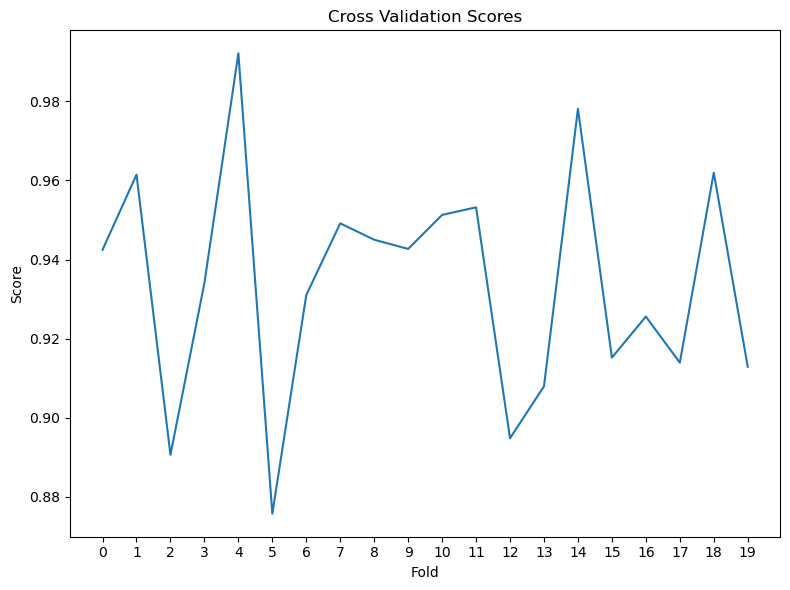

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(cross_val)
plt.title("Cross Validation Scores")
plt.ylabel("Score")
plt.xlabel("Fold")
plt.xticks(np.arange(0,20))
plt.tight_layout()
plt.show()

In [63]:
print(cross_val.max())

0.9921046530554398


In [64]:
data_new = pd.DataFrame({'LV ActivePower (kW)': y_test})
data_new['Predictions'] = y_pred
data_new["Theoretical_Power_Curve (KWh)"] = df_turk["Theoretical_Power_Curve (KWh)"]

data_new.head()

,LV ActivePower (kW),Predictions,Theoretical_Power_Curve (KWh)
14151,True,0.999487,3600.000000
14544,False,0.000421,39.913105
7729,True,0.955338,1722.203305
19423,True,0.998626,3600.000000
19220,False,0.003113,317.207261


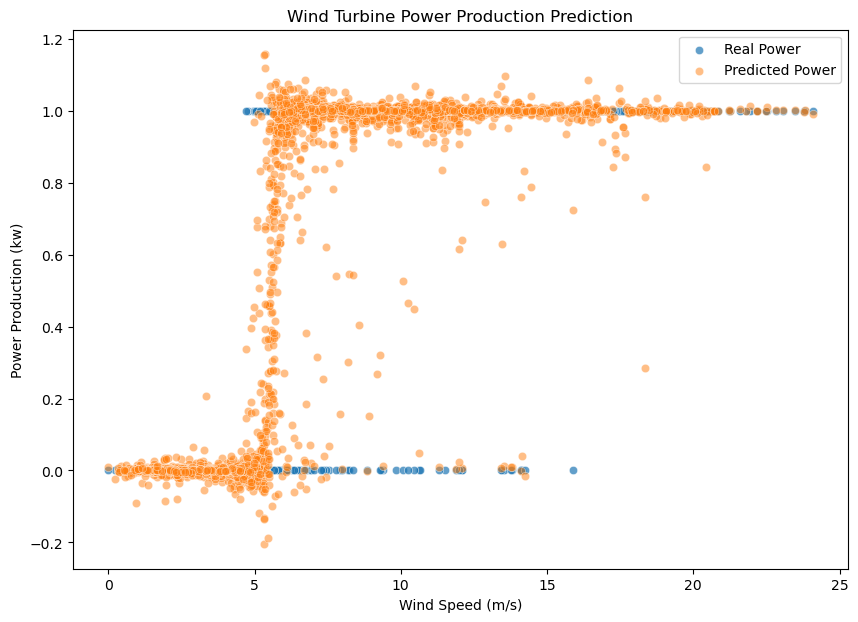

In [66]:
# Visualizing real, theoritical and predicted power production
plt.figure(figsize=(10,7))
sns.scatterplot(x=df_turk['Wind Speed (m/s)'], y=data_new['LV ActivePower (kW)'],alpha=0.7, label= 'Real Power')
sns.scatterplot(x=df_turk['Wind Speed (m/s)'], y=data_new['Predictions'], alpha=0.5, label='Predicted Power', marker='o')
plt.title('Wind Turbine Power Production Prediction')
plt.ylabel('Power Production (kw)')
plt.legend()